<a href="https://colab.research.google.com/github/Rahul2661998/Capstone-Project-Ted-Talk-Views-Prediction-/blob/main/Ted_Talk_Views_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

##**"TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website."**

##***Attribute / Description /Data Type***

***talk_id Talk / identification
number provided by
TED / int***

***title / Title of the talk / string***

***speaker_1 / First speaker in TED's
speaker list / string***

***speakers / Speakers in the talk dictionary***

***occupations *Occupations of the
speakers / dictionary***

***about_speakers / *Blurb about each
speaker / dictionary***

***views(Dependent
Variable) / Count of views / int***

***recorded_date / Date the talk was
recorded / string*** 

***published_date / Date the talk was
published to TED.com / string***

***event / Event or medium in
which the talk was given / string***

***native_lang / Language the talk was
given in / string***

***available_lang / All available languages
(lang_code) for a talk / list***

***comments / Count of comments / int***

***duration / Duration in seconds / int***

***topics / Related tags or topics for the talk / list***

***related_talks / Related talks
(key='talk_id',
value='title') / dictionary***

***url / URL of the talk / string***

***description / Description of the talk / string***

***transcript / Full transcript of the talk / string***

****The dictionary key maps to the speaker in ‘speakers’.***

##**Importing Packages**

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set() 
import ast

In [122]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')

In [123]:
raw_data=pd.read_csv("/content/drive/MyDrive/Alma Better/Capstone Project Regression Model/Copy of data_ted_talks.csv")

# ***Lets first describe our data.*** 

In [124]:
raw_data.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [125]:
# checking for null values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [126]:
raw_data.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [127]:
# Duplicate values check
print(raw_data.duplicated().sum())

0


##***Now we can start our Exploratory Data Analysis***

In [128]:
raw_data.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Formating DateTime

In [129]:
from datetime import datetime
import calendar
today=datetime.now()
today.strftime('%Y-%m-%d')

'2022-09-19'

The format of recorded_date and published_date are in string format, we have to convert them into date format

In [130]:
# Recorded date formatting:
raw_data['recorded_date']= pd.to_datetime(raw_data['recorded_date'])
# Published date formatting:
raw_data['published_date']= pd.to_datetime(raw_data['published_date'])

In [131]:
raw_data[['recorded_date','published_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   recorded_date   4004 non-null   datetime64[ns]
 1   published_date  4005 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 62.7 KB


In [132]:
# Number of days Ted talk has been published
last_publishing_date= raw_data['published_date'].max()
raw_data['time_passed_since_published']= last_publishing_date - pd.DatetimeIndex(raw_data['published_date'])

In [133]:
import datetime
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order   = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
raw_data['publish_month'] = pd.DatetimeIndex(raw_data['published_date']).month
raw_data['publish_month'] = raw_data['publish_month'].apply(lambda x: calendar.month_abbr[x])
raw_data['publish_year'] = pd.DatetimeIndex(raw_data['published_date']).year
raw_data['publish_day'] = pd.DatetimeIndex(raw_data['published_date']).day
raw_data['publish_week_day']= raw_data['published_date'].apply(lambda x: day_order[datetime.date(x.year, x.month, x.day).weekday()])

##***Creating variable for Daily Views(Target)***

In [134]:
# Daily views/Talk:
raw_data['daily_views'] = raw_data['views'] / ( raw_data['time_passed_since_published'].apply(lambda x : x.days) + 1 )

In [135]:
raw_data[['publish_month','publish_year','publish_day','publish_week_day','daily_views']]

,publish_month,publish_year,publish_day,publish_week_day,daily_views
0,Jun,2006,27,Tue,696.735614
1,Jun,2006,27,Tue,2867.645837
2,Jun,2006,27,Tue,379.836267
3,Jun,2006,27,Tue,526.808187
4,Jun,2006,27,Tue,12863.744117
...,...,...,...,...,...
4000,Apr,2020,27,Mon,125733.500000
4001,Apr,2020,27,Mon,76796.750000
4002,Apr,2020,28,Tue,154804.666667
4003,Apr,2020,30,Thu,56582.000000


### Continuous variables

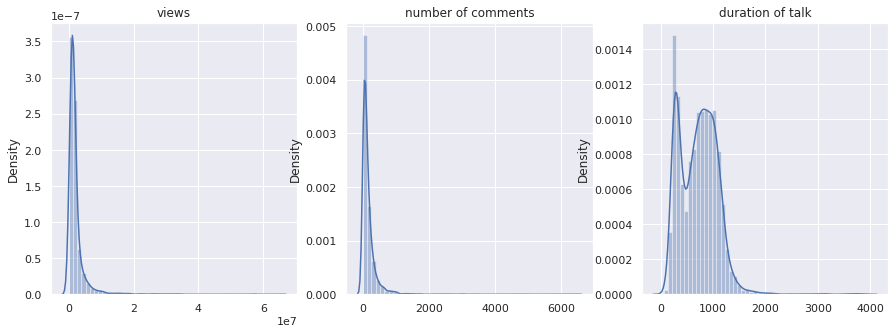

In [136]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("views")
sns.distplot(x= raw_data['views'])

plt.subplot(1,3,2)
plt.title("number of comments")
sns.distplot(x= raw_data['comments'])

plt.subplot(1,3,3)
plt.title("duration of talk")
sns.distplot(x= raw_data['duration'])

plt.show()

#***Bivariate analysis with dependent variable***



##   speaker_1 vs views



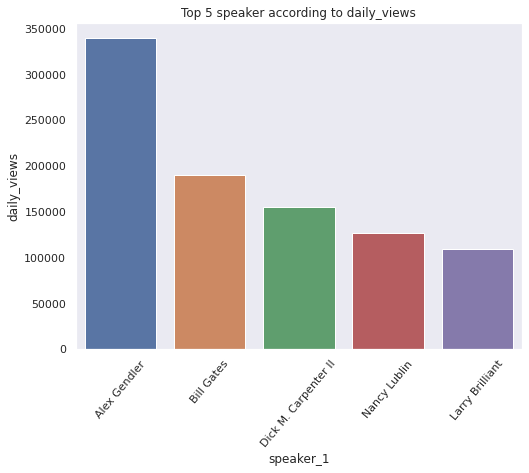

In [137]:
#top 25 speakers
temp=raw_data.groupby(['speaker_1'],as_index=False)['daily_views'].sum().sort_values('daily_views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1', y='daily_views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.title('Top 5 speaker according to daily_views')
ax.grid(False)

### Speaker Vs Number of talks delivered

In [138]:
data_speaker_count=pd.DataFrame(raw_data['speaker_1'].value_counts()).reset_index().rename(columns=({'index':'Speaker','speaker_1':'Number of talks'}))

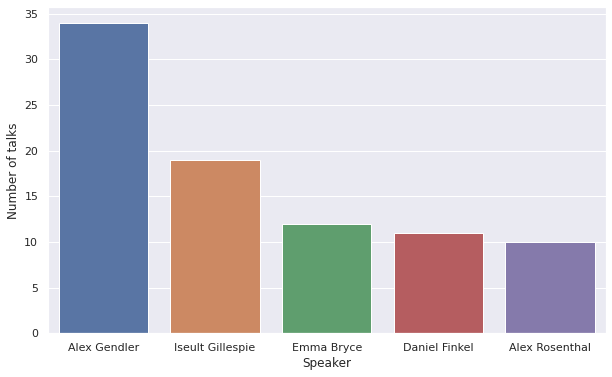

In [139]:
most_talks = data_speaker_count.nlargest(5, 'Number of talks')
plt.figure(figsize=(10,6))
sns.barplot(x = 'Speaker', y = 'Number of talks', data = most_talks)
plt.show()

### speaker vs duration

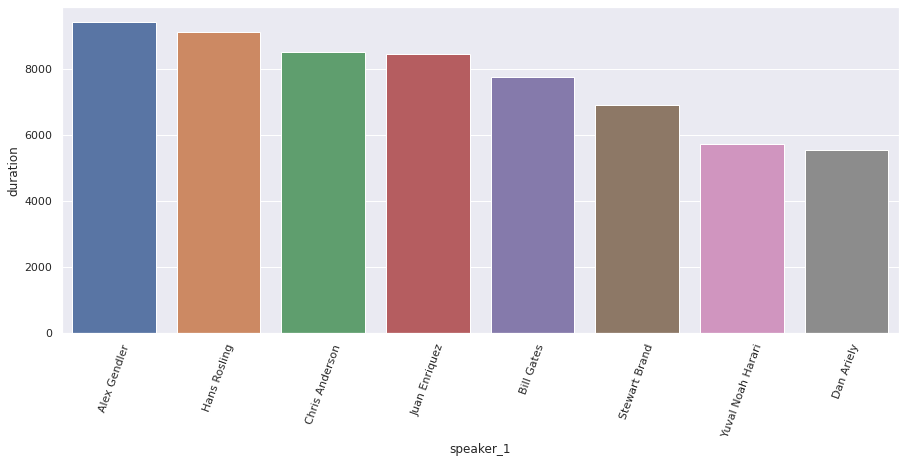

In [140]:
temp=raw_data.groupby(['speaker_1'],as_index=False)['duration'].sum().sort_values('duration',ascending=False)[:25]
temp=raw_data.groupby(['speaker_1'],as_index=False).agg({'duration':'sum','talk_id':'count'}).sort_values('duration',ascending=False).reset_index()[:8]
temp['talk_id']=temp['duration']/temp['talk_id']
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker_1',y='duration',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels, rotation=70);

### Speaker vs comments

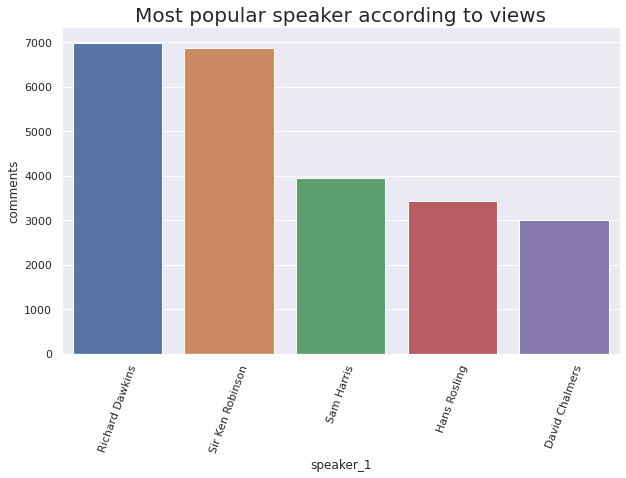

In [141]:
temp=raw_data.groupby(['speaker_1'],as_index=False)['comments'].sum().sort_values('comments',ascending=False)[:5]
plt.figure(figsize=(10,6))
ax=sns.barplot(x='speaker_1',y='comments',data=temp);
plt.setp(ax.get_xticklabels(), rotation=70);
plt.title('Most popular speaker according to views',fontsize=20)
plt.show()

### Speaker vs Average Views

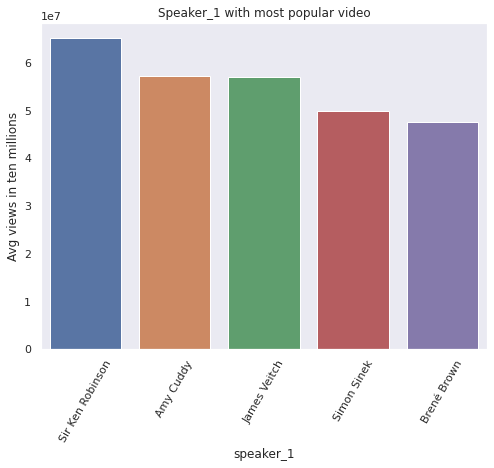

In [142]:
# Speaker most popular video
temp=raw_data[['speaker_1','views']].sort_values('views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1',y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=60);
plt.title('Speaker_1 with most popular video')
plt.ylabel('Avg views in ten millions')
ax.grid(False)

## **Target Encoding**

### ***Target encoding is the process of replacing a catgorical variable values with the mean of the target (dependent variable) variable***

### Applying Target encoding on speaker_1

In [143]:
speaker=raw_data.groupby('speaker_1').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
speaker=speaker.to_dict()
speaker=speaker.values()
speaker=  list(speaker)[0]
raw_data['speaker_1_avg_views']=raw_data['speaker_1'].map(speaker)

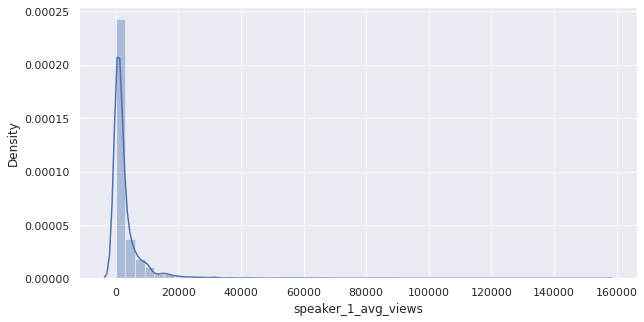

In [144]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['speaker_1_avg_views'])
plt.show()

## **Event**

### Event is also a catagorical variable, therefore we also apply target encoding on it. 

In [145]:
event=raw_data.groupby('event').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
event=event.to_dict()
event=event.values()
event=  list(event)[0]
raw_data['event_wise_avg_views']=raw_data['event'].map(event)

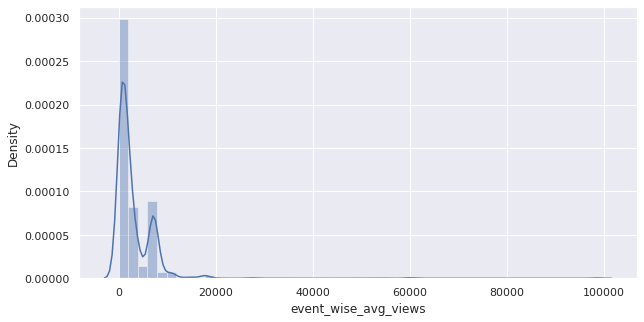

In [146]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['event_wise_avg_views'])
plt.show()

## **Top 10 Ted Talk events**

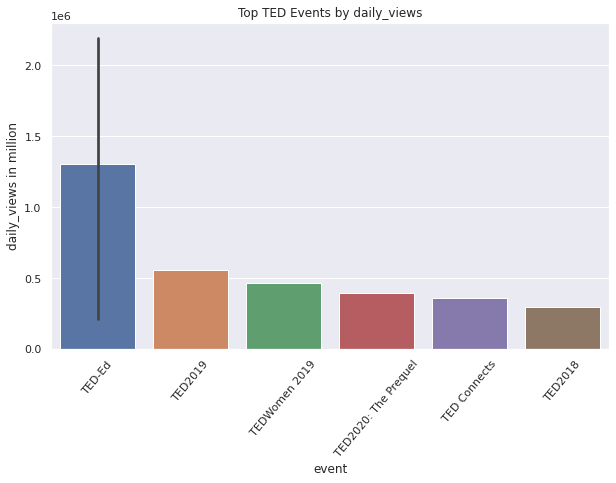

In [147]:
temp=raw_data.groupby(['event','publish_year'],as_index=False).agg({'daily_views':'sum','talk_id':'count'}).sort_values('daily_views',ascending=False).reset_index()[:8]
temp['talk_id']=temp['daily_views']/temp['talk_id']
plt.figure(figsize=(10,6))
ax=sns.barplot(x='event',y='daily_views',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by daily_views')
plt.ylabel('daily_views in million')
plt.setp(labels, rotation=50);

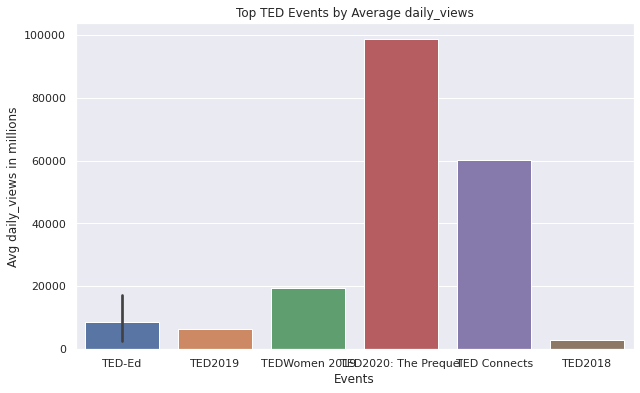

In [148]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='event',y='talk_id',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by Average daily_views')
plt.xlabel('Events')
plt.ylabel('Avg daily_views in millions')
plt.show()

#**available_language variable** 



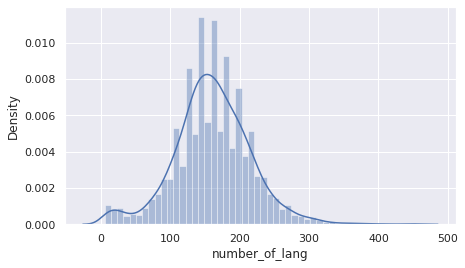

In [149]:
raw_data['number_of_lang'] = raw_data['available_lang'].apply(lambda x: len(x))
sns.distplot(raw_data['number_of_lang'])
plt.show()

##**Topic variable**

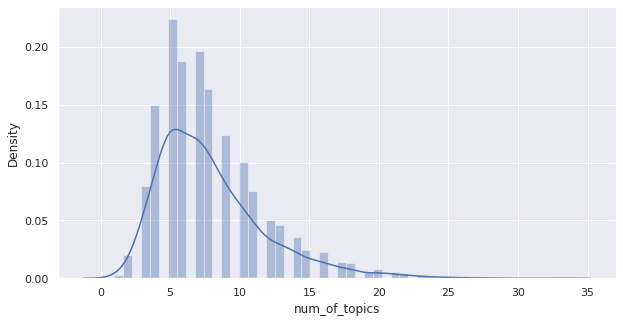

In [150]:
raw_data['topics'] = raw_data.apply(lambda x: eval(x['topics']), axis=1)
raw_data['num_of_topics'] = raw_data.apply(lambda x: len(x['topics']), axis=1)
# graph:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['num_of_topics'])

###***Unique Topics***

In [151]:
#Checking for unique topic
unique_topics=[]
for i in range(0,len(raw_data)):
  temp=raw_data['topics'][i]
  for i in temp:
    if(i not in unique_topics):
      unique_topics.append(i)
      
len(unique_topics)

457

In [152]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(raw_data)):
    temp2=raw_data['topics'][i]
    if(topic in temp2):
      temp+=raw_data['daily_views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [153]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(raw_data)):
  temp=0
  temp_topic=raw_data['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
raw_data['topics_wise_avg_views'] = se.values

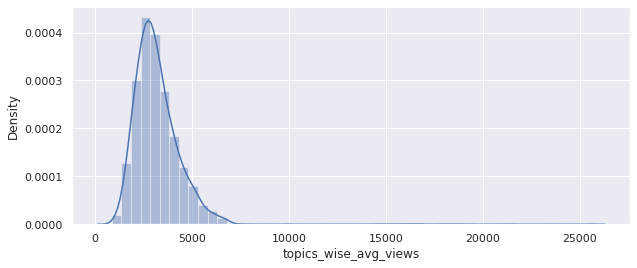

In [154]:
# Graph:
plt.figure(figsize=(10,4))
sns.distplot(raw_data['topics_wise_avg_views'])

## ***related_talks variable***

In [155]:
raw_data['related_talks'] = raw_data['related_talks'].apply(lambda x: ast.literal_eval(x))

####**Related talk column contains a dictionary containing information about related videos with talk_id as key and video name as it's value. taking mean of all realated talk videos views**

In [156]:
#defining a new feature called related_views
raw_data['related_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in raw_data.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(raw_data)):
      if (raw_data.loc[i,'talk_id']) in id_list:
        temp+=raw_data.loc[i,'daily_views']

    raw_data.loc[index,'related_views']=temp//6

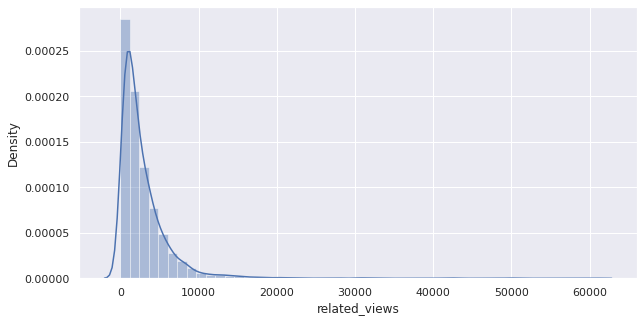

In [157]:
#Graph of related_views column
plt.figure(figsize=(10,5))
sns.distplot(raw_data['related_views'])
plt.show()

####converting time_passed_since_published into integer

In [158]:
raw_data['time_passed_since_published'] = raw_data['time_passed_since_published'].dt.days.astype('int16')

##***Feature Engineering and Data Preprocessing***

Verifying OLS assumptions

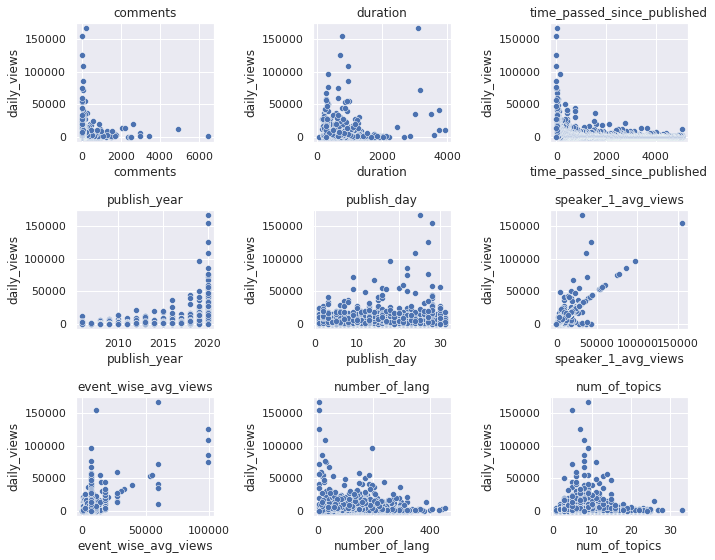

In [159]:
# checking for Linearity

fig = plt.figure(figsize=(10,8))

plt.subplot(3,3,1)
plt.title("comments")
sns.scatterplot(raw_data['comments'],raw_data['daily_views'])

plt.subplot(3,3,2)
plt.title("duration")
sns.scatterplot(raw_data['duration'],raw_data['daily_views'])

plt.subplot(3,3,3)
plt.title("time_passed_since_published")
sns.scatterplot(raw_data['time_passed_since_published'],raw_data['daily_views'])

plt.subplot(3,3,4)
plt.title("publish_year")
sns.scatterplot(raw_data['publish_year'],raw_data['daily_views'])

plt.subplot(3,3,5)
plt.title("publish_day")
sns.scatterplot(raw_data['publish_day'],raw_data['daily_views'])

plt.subplot(3,3,6)
plt.title("speaker_1_avg_views")
sns.scatterplot(raw_data['speaker_1_avg_views'],raw_data['daily_views'])

plt.subplot(3,3,7)
plt.title("event_wise_avg_views")
sns.scatterplot(raw_data['event_wise_avg_views'],raw_data['daily_views'])


plt.subplot(3,3,8)
plt.title("number_of_lang")
sns.scatterplot(raw_data['number_of_lang'],raw_data['daily_views'])

plt.subplot(3,3,9)
plt.title("num_of_topics")
sns.scatterplot(raw_data['num_of_topics'],raw_data['daily_views'])

plt.tight_layout()
plt.show()


Transformation for Linearity


In [160]:
# Transformation
raw_data['log_daily_views']=np.log(raw_data['daily_views'])
raw_data['log_comments']=np.log(raw_data['comments'])
raw_data['log_speaker_1_avg_views']=np.log(raw_data['speaker_1_avg_views'])
raw_data['log_event_wise_avg_views']=np.log(raw_data['event_wise_avg_views'])

In [164]:
raw_data['log_duration']=np.log(raw_data['duration'])

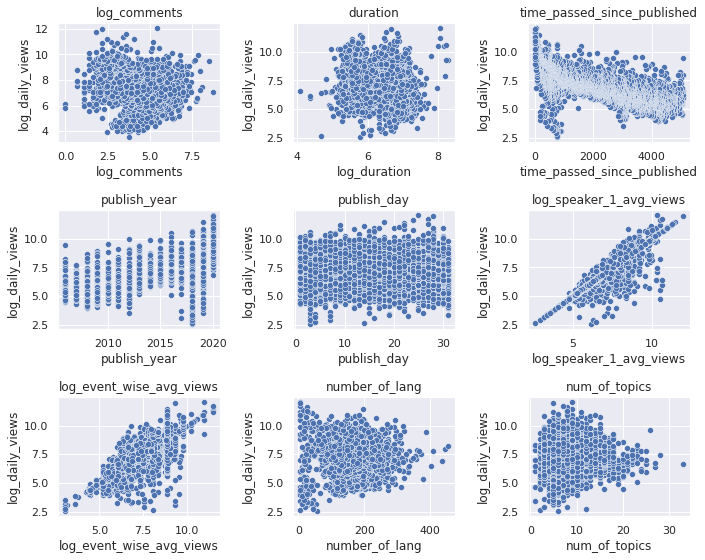

In [170]:
#  Linearity

fig = plt.figure(figsize=(10,8))

plt.subplot(3,3,1)
plt.title("log_comments")
sns.scatterplot(raw_data['log_comments'],raw_data['log_daily_views'])

plt.subplot(3,3,2)
plt.title("duration")
sns.scatterplot(raw_data['log_duration'],raw_data['log_daily_views'])

plt.subplot(3,3,3)
plt.title("time_passed_since_published")
sns.scatterplot(raw_data['time_passed_since_published'],raw_data['log_daily_views'])

plt.subplot(3,3,4)
plt.title("publish_year")
sns.scatterplot(raw_data['publish_year'],raw_data['log_daily_views'])

plt.subplot(3,3,5)
plt.title("publish_day")
sns.scatterplot(raw_data['publish_day'],raw_data['log_daily_views'])

plt.subplot(3,3,6)
plt.title("log_speaker_1_avg_views")
sns.scatterplot(raw_data['log_speaker_1_avg_views'],raw_data['log_daily_views'])

plt.subplot(3,3,7)
plt.title("log_event_wise_avg_views")
sns.scatterplot(raw_data['log_event_wise_avg_views'],raw_data['log_daily_views'])


plt.subplot(3,3,8)
plt.title("number_of_lang")
sns.scatterplot(raw_data['number_of_lang'],raw_data['log_daily_views'])

plt.subplot(3,3,9)
plt.title("num_of_topics")
sns.scatterplot(raw_data['num_of_topics'],raw_data['log_daily_views'])

plt.tight_layout()
plt.show()


##Outliers Detection

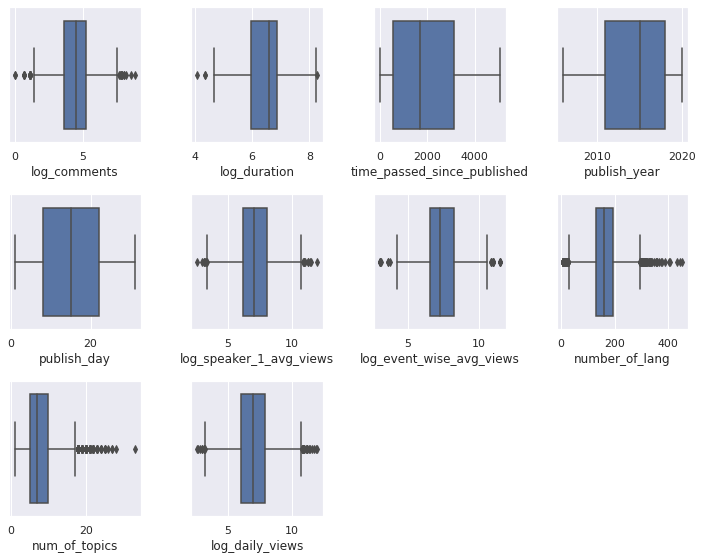

In [167]:
# Boxplots
fig = plt.figure(figsize=(10,8))

plt.subplot(3,4,1)
#plt.title("log_comments")
sns.boxplot(x= raw_data['log_comments'])

plt.subplot(3,4,2)
#plt.title("duration")
sns.boxplot(x= raw_data['log_duration'])

plt.subplot(3,4,3)
#plt.title("time_passed_since_published")
sns.boxplot(x= raw_data['time_passed_since_published'])

plt.subplot(3,4,4)
#plt.title("publish_year")
sns.boxplot(x= raw_data['publish_year'])

plt.subplot(3,4,5)
#plt.title("publish_day")
sns.boxplot(x= raw_data['publish_day'])

plt.subplot(3,4,6)
#plt.title("log_speaker_1_avg_views")
sns.boxplot(x= raw_data['log_speaker_1_avg_views'])

plt.subplot(3,4,7)
#plt.title("log_event_wise_avg_views")
sns.boxplot(x= raw_data['log_event_wise_avg_views'])


plt.subplot(3,4,8)
#plt.title("number_of_lang")
sns.boxplot(x= raw_data['number_of_lang'])

plt.subplot(3,4,9)
#plt.title("num_of_topics")
sns.boxplot(x= raw_data['num_of_topics'])

plt.subplot(3,4,10)
#plt.title("log_daily_views")
sns.boxplot(x= raw_data['log_daily_views'])

plt.tight_layout()
plt.show()

In [168]:
# removing outliers from log_comments
q_low = raw_data['log_comments'].quantile(0.01)
q_hi  = raw_data['log_comments'].quantile(0.99)

df_1 = raw_data[(raw_data['log_comments'] < q_hi) & (raw_data['log_comments'] > q_low)]

In [171]:
# removing outliers from log_duration
q_low = df_1["log_duration"].quantile(0.01)
q_hi  = df_1["log_duration"].quantile(0.99)

df_2 = df_1[(df_1["log_duration"] < q_hi) & (df_1["log_duration"] > q_low)]

In [172]:
# removing outliers from log_speaker_1_avg_views
q_low = df_2["log_speaker_1_avg_views"].quantile(0.01)
q_hi  = df_2["log_speaker_1_avg_views"].quantile(0.99)

df_3 = df_2[(df_2["log_speaker_1_avg_views"] < q_hi) & (df_2["log_speaker_1_avg_views"] > q_low)]

In [173]:
# removing outliers from log_event_wise_avg_views
q_low = df_3["log_event_wise_avg_views"].quantile(0.01)
q_hi  = df_3["log_event_wise_avg_views"].quantile(0.99)

df_4 = df_3[(df_3["log_event_wise_avg_views"] < q_hi) & (df_3["log_event_wise_avg_views"] > q_low)]

In [174]:
# removing outliers from number_of_lang
q_low = df_4["number_of_lang"].quantile(0.01)
q_hi  = df_4["number_of_lang"].quantile(0.99)

df_5 = df_4[(df_4["number_of_lang"] < q_hi) & (df_4["number_of_lang"] > q_low)]

In [175]:
# removing outliers from num_of_topics
q_hi  = df_5["num_of_topics"].quantile(0.99)

df_6 = df_5[df_5["num_of_topics"] < q_hi]

In [176]:
# removing outliers from log_daily_views
q_low = df_6["log_daily_views"].quantile(0.01)
q_hi  = df_6["log_daily_views"].quantile(0.99)

df_filtered = df_6[(df_6["log_daily_views"] < q_hi) & (df_6["log_daily_views"] > q_low)]

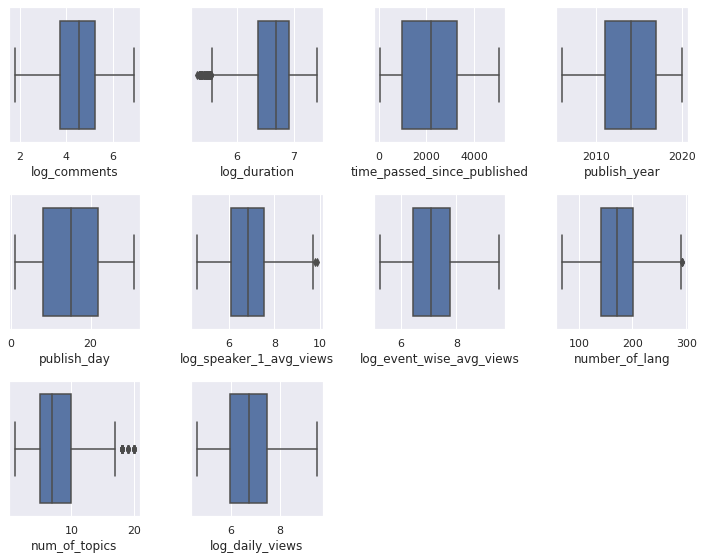

In [178]:
# New Boxplots
fig = plt.figure(figsize=(10,8))

plt.subplot(3,4,1)
#plt.title("log_comments")
sns.boxplot(x= df_filtered['log_comments'])

plt.subplot(3,4,2)
#plt.title("duration")
sns.boxplot(x= df_filtered['log_duration'])

plt.subplot(3,4,3)
#plt.title("time_passed_since_published")
sns.boxplot(x= df_filtered['time_passed_since_published'])

plt.subplot(3,4,4)
#plt.title("publish_year")
sns.boxplot(x= df_filtered['publish_year'])

plt.subplot(3,4,5)
#plt.title("publish_day")
sns.boxplot(x= df_filtered['publish_day'])

plt.subplot(3,4,6)
#plt.title("log_speaker_1_avg_views")
sns.boxplot(x= df_filtered['log_speaker_1_avg_views'])

plt.subplot(3,4,7)
#plt.title("log_event_wise_avg_views")
sns.boxplot(x= df_filtered['log_event_wise_avg_views'])


plt.subplot(3,4,8)
#plt.title("number_of_lang")
sns.boxplot(x= df_filtered['number_of_lang'])

plt.subplot(3,4,9)
#plt.title("num_of_topics")
sns.boxplot(x= df_filtered['num_of_topics'])

plt.subplot(3,4,10)
#plt.title("log_daily_views")
sns.boxplot(x= df_filtered['log_daily_views'])

plt.tight_layout()
plt.show()

Removing irrelevent features

In [180]:
df_filtered.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript',
       'time_passed_since_published', 'publish_month', 'publish_year',
       'publish_day', 'publish_week_day', 'daily_views', 'speaker_1_avg_views',
       'event_wise_avg_views', 'number_of_lang', 'num_of_topics',
       'topics_wise_avg_views', 'related_views', 'log_daily_views',
       'log_comments', 'log_speaker_1_avg_views', 'log_event_wise_avg_views',
       'log_duration'],
      dtype='object')

In [181]:
unwanted_features=['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'comments', 'duration', 'daily_views','speaker_1_avg_views',
       'event_wise_avg_views']

In [182]:
df_filtered.drop(columns=unwanted_features,inplace=True)

In [188]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2894 entries, 0 to 3958
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time_passed_since_published  2894 non-null   int16  
 1   publish_month                2894 non-null   object 
 2   publish_year                 2894 non-null   int64  
 3   publish_day                  2894 non-null   int64  
 4   publish_week_day             2894 non-null   object 
 5   number_of_lang               2894 non-null   int64  
 6   num_of_topics                2894 non-null   int64  
 7   topics_wise_avg_views        2894 non-null   float64
 8   related_views                2894 non-null   int64  
 9   log_daily_views              2894 non-null   float64
 10  log_comments                 2894 non-null   float64
 11  log_speaker_1_avg_views      2894 non-null   float64
 12  log_event_wise_avg_views     2894 non-null   float64
 13  log_duration      

##Removing collinearity

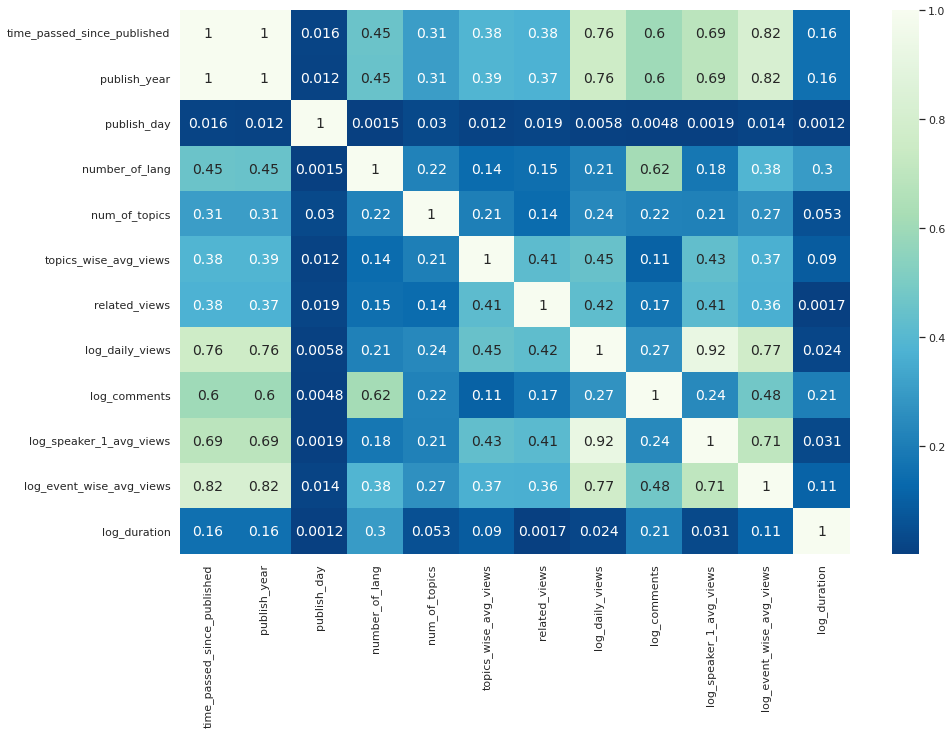

In [186]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(np.abs(df_filtered.corr()), annot= True, cmap= 'GnBu_r',ax=ax)
plt.show()

##Variance inflation factor analysis

In [203]:
vif_data=df_filtered.drop(['publish_week_day','publish_month','log_daily_views','publish_year','log_duration','log_speaker_1_avg_views','log_comments','log_event_wise_avg_views','number_of_lang'],axis=1)

In [204]:
vif_df=pd.DataFrame()
vif_df['features']=vif_data.columns
vif_df['VIF']=[variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])]
vif_df

,features,VIF
0,time_passed_since_published,3.016565
1,publish_day,3.873700
2,num_of_topics,5.311096
3,topics_wise_avg_views,9.886435
4,related_views,2.352867


We have taken the VIF limit 10, Therefore dataframe without multicolinearity is:

##Lets check for normality in data

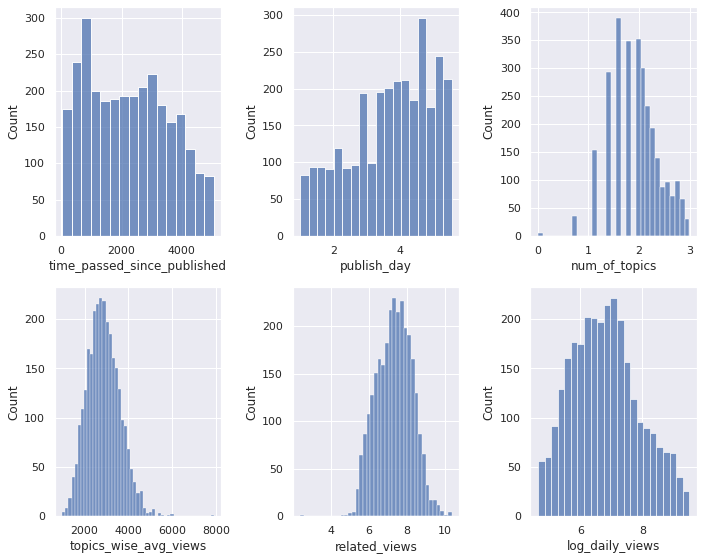

In [215]:
# Ploting distributions of features

fig = plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
#plt.title("log_comments")
sns.histplot(x= df_filtered['time_passed_since_published'])

plt.subplot(2,3,2)
#plt.title("publish_day")
sns.histplot(x= np.sqrt(df_filtered['publish_day']))

plt.subplot(2,3,3)
#plt.title("num_of_topics")
sns.histplot(x= np.log(df_filtered['num_of_topics']))

plt.subplot(2,3,4)
#plt.title("log_daily_views")
sns.histplot(x= df_filtered['topics_wise_avg_views'])

plt.subplot(2,3,5)
#plt.title("log_daily_views")
sns.histplot(x= np.log(df_filtered['related_views']))


plt.subplot(2,3,6)
#plt.title("log_daily_views")
sns.histplot(x= df_filtered['log_daily_views'])

plt.tight_layout()
plt.show()

In [217]:
# Transformation
df_filtered['sqrt_publish_day']=np.sqrt(df_filtered['publish_day'])
df_filtered['log_num_of_topics']=np.log(df_filtered['num_of_topics'])
df_filtered['log_related_views']=np.log(df_filtered['related_views'])

In [218]:
df_filtered.columns

Index(['time_passed_since_published', 'publish_month', 'publish_year',
       'publish_day', 'publish_week_day', 'number_of_lang', 'num_of_topics',
       'topics_wise_avg_views', 'related_views', 'log_daily_views',
       'log_comments', 'log_speaker_1_avg_views', 'log_event_wise_avg_views',
       'log_duration', 'sqrt_publish_day', 'log_num_of_topics',
       'log_related_views'],
      dtype='object')

In [228]:
data=df_filtered.drop(['publish_year','log_duration','log_speaker_1_avg_views','log_comments','log_event_wise_avg_views','number_of_lang','publish_day','num_of_topics','related_views'],axis=1)

In [229]:
data.columns

Index(['time_passed_since_published', 'publish_month', 'publish_week_day',
       'topics_wise_avg_views', 'log_daily_views', 'sqrt_publish_day',
       'log_num_of_topics', 'log_related_views'],
      dtype='object')

#Lets start the model preparation. 

In [230]:
data['log_daily_views'].describe()

count    2894.000000
mean        6.802940
std         1.097150
min         4.630807
25%         5.970439
50%         6.753454
75%         7.492625
max         9.519972
Name: log_daily_views, dtype: float64

In [231]:
data=data.dropna()

In [232]:
data['log_daily_views'].describe()

count    2894.000000
mean        6.802940
std         1.097150
min         4.630807
25%         5.970439
50%         6.753454
75%         7.492625
max         9.519972
Name: log_daily_views, dtype: float64

## Defining dependent and independent features

Introducing dummy variables for Catagorical features

In [249]:
data_dummy=pd.get_dummies(data,drop_first=True)
data_dummy.shape

(2894, 23)

In [250]:
y=data_dummy['log_daily_views']
X=data_dummy.drop(columns='log_daily_views')

In [251]:
X.head()

,time_passed_since_published,topics_wise_avg_views,sqrt_publish_day,log_num_of_topics,log_related_views,publish_month_Aug,publish_month_Dec,publish_month_Feb,publish_month_Jan,publish_month_Jul,...,publish_month_May,publish_month_Nov,publish_month_Oct,publish_month_Sep,publish_week_day_Mon,publish_week_day_Sat,publish_week_day_Sun,publish_week_day_Thu,publish_week_day_Tue,publish_week_day_Wed
0,5056,2432.0,5.196152,2.197225,8.036897,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,5056,1876.0,5.196152,2.197225,7.331715,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5056,2166.0,5.196152,2.197225,6.683361,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,5043,1864.0,3.162278,1.609438,7.002156,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,5043,2176.0,3.162278,2.197225,7.717796,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


Next we will standardize the features

In [252]:
scaler=MinMaxScaler()
scaler.fit(X)
x=scaler.transform(X)

Lets split the data into training and testing 

In [253]:
# Spliting dataset into training and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [254]:
# Regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [255]:
yhat=reg.predict(x_train)

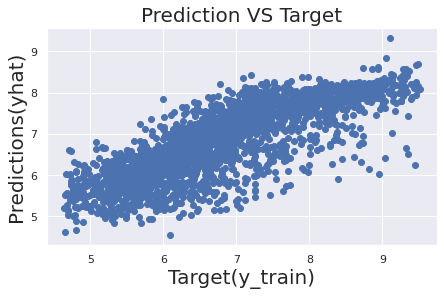

In [256]:
plt.scatter(y_train,yhat)
plt.xlabel('Target(y_train)',fontsize=20)
plt.ylabel('Predictions(yhat)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

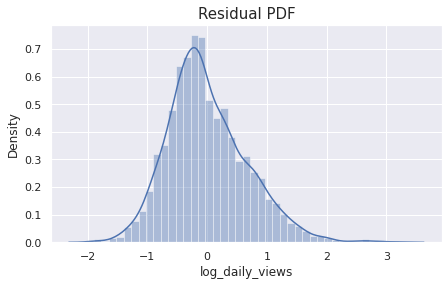

In [257]:
# Other way to judge the model
sns.distplot(y_train-yhat)
plt.title('Residual PDF',fontsize=15)
plt.show()

In [258]:
# R-square to explain the variability our model id able to explain
reg.score(x_train,y_train)


0.6383238976233143

In [259]:
summary=pd.DataFrame({'Features':X.columns,'Weight':reg.coef_})
summary

,Features,Weight
0,time_passed_since_published,-2.510004
1,topics_wise_avg_views,1.335977
2,sqrt_publish_day,-0.077709
3,log_num_of_topics,-0.014797
4,log_related_views,1.689847
5,publish_month_Aug,-0.118861
6,publish_month_Dec,-0.190460
7,publish_month_Feb,-0.203362
8,publish_month_Jan,-0.120711
9,publish_month_Jul,0.027399


#***Wieghts Interpretation***
##***Continuous Variable***
### 1. A ***positive wieght*** shows that as the feature increases in values so does the Price and log_price variables.
### 2. A ***negative wieght*** shows that as the feature increases in values the Price and log_price variables decreses in values.

##***Dummy Variables***
### 1. A ***positive wieght*** shows that the respective catagory(e.g Brand) is more expensive than the benchmark(e.g Audi)
### 2. A ***positive wieght*** shows that the respective catagory(e.g Brand) is less expensive than the benchmark(e.g Audi)

#Testing

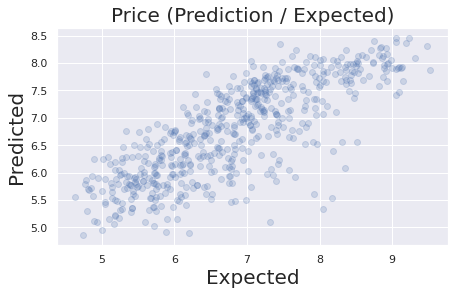

In [260]:
yhat_test=reg.predict(x_test)
plt.scatter(y_test,yhat_test,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Price (Prediction / Expected)',fontsize=20)
plt.show()

In [261]:
pf_df=pd.DataFrame({'Predictions':yhat_test})
pf_df.head()

,Predictions
0,7.341919
1,6.288931
2,7.892077
3,5.968353
4,6.909716


In [262]:
y_test=y_test.reset_index(drop=True)
pf_df['Target(expected values)']=y_test

In [263]:
pf_df

,Predictions,Target(expected values)
0,7.341919,7.234447
1,6.288931,5.948436
2,7.892077,7.683538
3,5.968353,5.962825
4,6.909716,7.843905
...,...,...
574,6.875813,7.430759
575,5.998732,5.740877
576,7.493572,6.779087
577,5.419881,5.050943


In [264]:
pf_df['Residual']=pf_df['Target(expected values)']-pf_df['Predictions']
pf_df['Difference_percentage']=np.absolute(pf_df['Residual']/pf_df['Target(expected values)']*100)
pf_df.describe()

,Predictions,Target(expected values),Residual,Difference_percentage
count,579.000000,579.000000,579.000000,579.000000
mean,6.771943,6.817596,0.045654,7.760142
std,0.862487,1.086921,0.665018,5.856465
min,4.851488,4.630807,-1.414812,0.000733
25%,6.031876,5.963079,-0.413127,3.263182
50%,6.781330,6.799083,-0.046040,6.691191
75%,7.526076,7.492820,0.490793,10.832234
max,8.463422,9.519972,2.721953,33.813747


# Conclusion

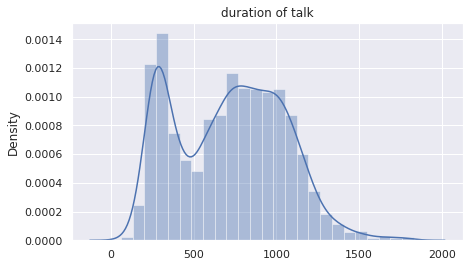

In [71]:
plt.title("duration of talk")
sns.distplot(x= raw_data['duration'])
plt.show()

In [72]:
# removing outliers for views
q=data['views'].quantile(0.99)
data_1=data[data['views']<q]

KeyError: ignored

In [ ]:
# removing outliers for comments
q=data_1['comments'].quantile(0.99)
data_2=data_1[data_1['comments']<q]

In [ ]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("views")
sns.distplot(x= data_3['views'])

plt.subplot(1,3,2)
plt.title("number of comments")
sns.distplot(x= data_3['comments'])

plt.subplot(1,3,3)
plt.title("duration of talk")
sns.distplot(x= data_3['duration'])

plt.show()

In [ ]:
data_3['log_views']=np.log(data_3['views'])
data_3['log_comments']=np.log(data_3['comments'])
data_3['log_duration']=np.log(data_3['duration'])

In [ ]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("views")
sns.histplot(x= data_3['log_views'])

plt.subplot(1,3,2)
plt.title("number of comments")
sns.histplot(x= data_3['log_comments'])

plt.subplot(1,3,3)
plt.title("duration of talk")
sns.histplot(x= data_3['log_duration'])

plt.show()

In [ ]:
data_3.describe(include='all')

In [ ]:
data_3['all_speakers']

In [ ]:
data_3['occupations']

In [ ]:
# Extracting all occupations
import ast
list_of_occupations=[]
for ele in data_3['occupations'].iteritems():
  for occ in ele:
    if type(occ)!=int:
        val=ast.literal_eval(occ)
        for key in val: 
          list_of_occupations.append(val[key])
list_of_occupations=[ele for list_ in list_of_occupations for ele in list_]

In [ ]:
len(list_of_occupations)

In [ ]:
pd.Series(list_of_occupations).value_counts()

In [ ]:
data_3['about_speakers']